In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os

In [2]:
df=pd.read_excel(r"C:\Users\Cyborg\Downloads\Street light Complaint Details last 6 Month.xlsx")

In [3]:
df.describe()

,Date,Agent,Date of Call,Unique Query Number,Address,Landmark,District,State,Call Type,Scheme,Source,Street Ligh Zone,Street Ligh ULBName,Street Ligh Ward No,Street Ligh Pole No,Street Ligh Ticket Type,Street Ligh Assigned To,Street Ligh Complaint From
count,157164,157164,157164,157164,157038,107311,157164,157164,157164,157164,157164,116064,157132,138007.0,44830,154383,157071,154788
unique,181,86,181,157164,150341,75927,175,17,3,1,7,76,466,4255.0,31609,4,413,11
top,2019-01-31 00:00:00,WEBCONSUMER,2019-01-31 00:00:00,SLDL00147938,MUNICIPAL CORPORATION PEC SECTOR 12 CHANDIGARH,NEAR SHIV MANDIR,SOUTH DELHI,DELHI (DL),COMPLAINT,STREET LIGHT,TOLLFREE,WEST ZONE,SDMC,9.0,1 POLE BAND HAI,LAMP,AYUSH,PUBLIC
freq,1530,11650,1530,1,277,289,52354,52355,157155,157164,82926,15598,52353,1696.0,200,150114,15597,81238
first,2018-11-01 00:00:00,NaN,2018-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-04-30 00:00:00,NaN,2019-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Number of data points:",df.shape[0])
print("Number of Cols:",df.shape[1])

Number of data points: 157164
Number of Cols: 18


In [5]:
df.head(4)

,Date,Agent,Date of Call,Unique Query Number,Address,Landmark,District,State,Call Type,Scheme,Source,Street Ligh Zone,Street Ligh ULBName,Street Ligh Ward No,Street Ligh Pole No,Street Ligh Ticket Type,Street Ligh Assigned To,Street Ligh Complaint From
0,2019-01-04,WEBCONSUMER,2019-01-04,SLUP00104413,C 12/15 LAHANGPURA VARANASU,DR IQBAL,VARANASI,UTTAR PRADESH (UP),COMPLAINT,STREET LIGHT,WEB,NaN,VARANASI NAGAR NIGAM,LAHANGPURA,-,CABLES/POWER SUPPLY,NaN,RESIDENT
1,2018-12-03,WEBCONSUMER,2018-12-03,SLUP00098562,"DIDAYAL NAGAR, DURGAKUND ,VARANASI -231005",DIDAYALNAGAR UDAYAN ( PARK .),VARANASI,UTTAR PRADESH (UP),COMPLAINT,STREET LIGHT,WEB,NaN,VARANASI NAGAR NIGAM,WARD NO.14,NaN,CABLES/POWER SUPPLY,NaN,RESIDENT
2,2018-11-14,WEBCONSUMER,2018-11-14,SLGJ00040122,"PLOT NO. 1270/A1,SECTOR-3/A, GANDHINAGAR",NaN,AHMEDABAD,GUJARAT (GJ),COMPLAINT,STREET LIGHT,WEB,NaN,NaN,"WARD-7, SECTOR-3/A",138,LAMP,NaN,RESIDENT
3,2018-11-20,WEBCONSUMER,2018-11-20,SLGJ00040291,GOLD COIN HIGHMAST BLINKING,GOLD COIN HIGHMAST BLINKING,VALSAD,GUJARAT (GJ),COMPLAINT,STREET LIGHT,WEB,NaN,NaN,NaN,NaN,NaN,NaN,RESIDENT


In [6]:
df.columns

Index(['   Date', 'Agent', 'Date of Call', 'Unique Query Number', 'Address',
       'Landmark', 'District', 'State', 'Call Type', 'Scheme', 'Source',
       'Street Ligh Zone', 'Street Ligh ULBName', 'Street Ligh Ward No',
       'Street Ligh Pole No', 'Street Ligh Ticket Type',
       'Street Ligh Assigned To', 'Street Ligh Complaint From'],
      dtype='object')

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# stopwords = set(STOPWORDS)



In [8]:
stopwords={'a', 'Name', 'NR', 'Primary', 'Pole', 
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r',
 'same',
 'shall',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "shouldn't",
 'since',
 'so',
 'some',
 'such',
 'than',
 'that',
 "that's",
 'the',
 'their',
 'theirs',
 'them',
 'themselves','NaN',
 'then',
 'there',
 "there's",
 'these',
 'they',
 "they'd",
 "they'll",
 "they're",
 "they've",
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 'very',
 'was',
 "wasn't","District", 'Length'
 'we',
 "we'd",
 "we'll",
 "we're",
 "we've",
 'were',
 "weren't",
 'what',
 "what's",
 'when',
 "when's",
 'where',
 "where's",
 'which',
 'while',
 'who',
 "who's",
 'whom',
 'why',
 "why's",
 'with',
 "won't",
 'would',
 "wouldn't",
 'www',
 'you',"Source", 
 "you'd",
 "you'll",
 "you're","Behind",
 "you've",
 'your',
 'yours','dtype','object', 
 'yourself',
 'yourselves'}



In [9]:
df.columns

Index(['   Date', 'Agent', 'Date of Call', 'Unique Query Number', 'Address',
       'Landmark', 'District', 'State', 'Call Type', 'Scheme', 'Source',
       'Street Ligh Zone', 'Street Ligh ULBName', 'Street Ligh Ward No',
       'Street Ligh Pole No', 'Street Ligh Ticket Type',
       'Street Ligh Assigned To', 'Street Ligh Complaint From'],
      dtype='object')

In [10]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [11]:
# import re
# from tqdm import tqdm
# from bs4 import BeautifulSoup
# preprocessed_reviews = []
# # tqdm is for printing the status bar
# for sentance in tqdm(df["Address"].values):
# #     sentance = re.sub(r"http\S+", "", sentance)
# #     sentance = BeautifulSoup(sentance, 'lxml').get_text()
#     sentance = decontracted(sentance)
#     sentance = re.sub("\S*\d\S*", "", sentance).strip()
#     sentance = re.sub('[^A-Za-z]+', ' ', sentance)
#     # https://gist.github.com/sebleier/554280
#     sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
#     preprocessed_reviews.append(sentance.strip())

In [12]:
X=df["Address"]
# y=final['Score'][:]
# X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=42)
X_train=X[:100000]
X_test=X[100000:]
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
v=TfidfVectorizer()


x_train_tfidf = v.fit_transform(X_train.values.astype('U'))
x_test_tfidf = v.transform(X_test.values.astype('U'))
# bow = CountVectorizer(strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None)
# X_train_bow=bow.fit_transform(X_train)
# X_test_bow=bow.transform(X_test)

In [14]:
# from sklearn.cluster import KMeans
# errors=[]
# k_value=[1,2,3,4,5]
# for i in k_value:
#     kmeans = KMeans(n_clusters=i, random_state=0, n_jobs=-1)
#     kmeans.fit(x_train_tfidf)
#     pred=kmeans.predict(x_test_tfidf)
#     errors.append(kmeans.inertia_)
# plt.plot(k_value, errors)

In [15]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

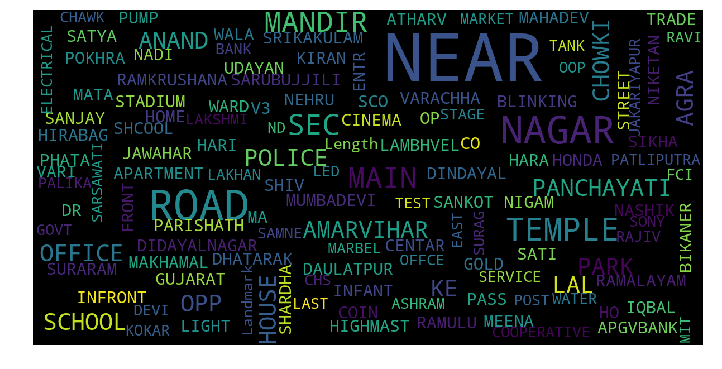

In [16]:
show_wordcloud(df['Landmark'])
# show_wordcloud(Samsung_Reviews_positive['Reviews'])

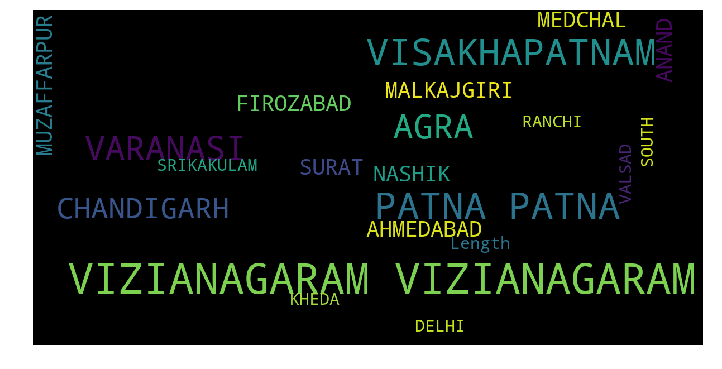

In [17]:
show_wordcloud(df['District'])

In [18]:
# show_wordcloud(df['Source'])

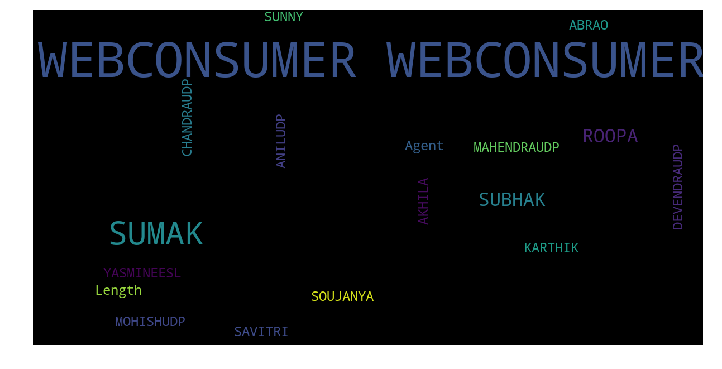

In [19]:
show_wordcloud(df['Agent'])

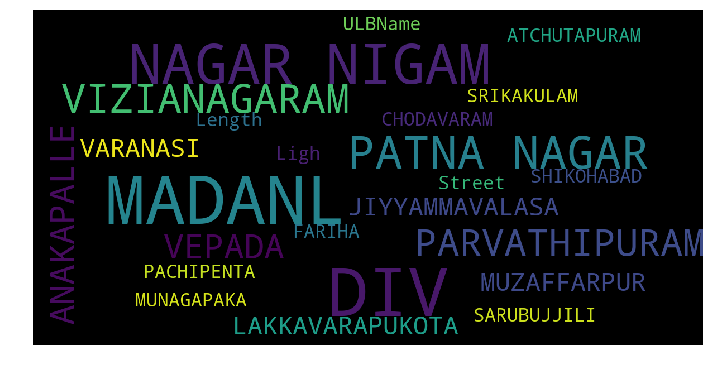

In [20]:
show_wordcloud(df['Street Ligh ULBName'])

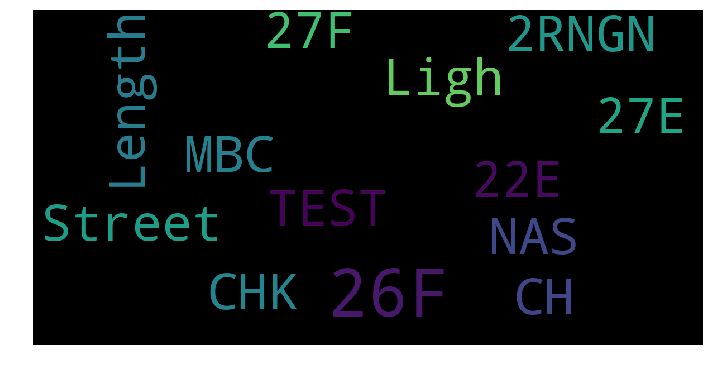

In [21]:
show_wordcloud(df['Street Ligh Pole No'])

In [22]:
# show_wordcloud(df['Date of Call'])

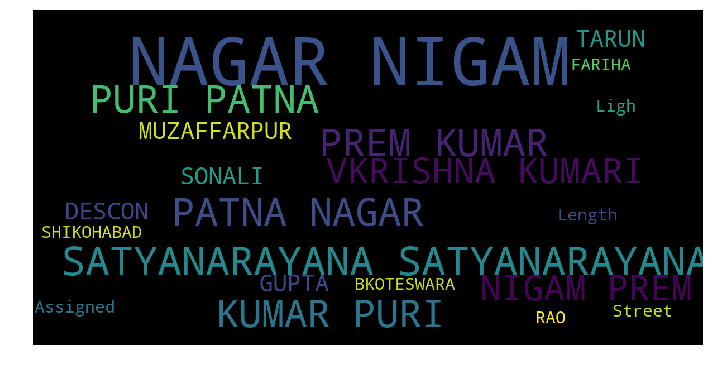

In [23]:
show_wordcloud(df['Street Ligh Assigned To'])

In [24]:
df.columns

Index(['   Date', 'Agent', 'Date of Call', 'Unique Query Number', 'Address',
       'Landmark', 'District', 'State', 'Call Type', 'Scheme', 'Source',
       'Street Ligh Zone', 'Street Ligh ULBName', 'Street Ligh Ward No',
       'Street Ligh Pole No', 'Street Ligh Ticket Type',
       'Street Ligh Assigned To', 'Street Ligh Complaint From'],
      dtype='object')

In [25]:
def labeler(x):
    labels_A=[]
    labels_B=[]
    labels_C=[]
    for i in range(x):
        labels_A.append("A_{}".format(i))
    for i in range(x):
        labels_B.append("B_{}".format(i))
    for i in range(x):
        labels_C.append("C_{}".format(i))
    return labels_A+labels_B+labels_C

In [26]:
labeler(10)

['A_0',
 'A_1',
 'A_2',
 'A_3',
 'A_4',
 'A_5',
 'A_6',
 'A_7',
 'A_8',
 'A_9',
 'B_0',
 'B_1',
 'B_2',
 'B_3',
 'B_4',
 'B_5',
 'B_6',
 'B_7',
 'B_8',
 'B_9',
 'C_0',
 'C_1',
 'C_2',
 'C_3',
 'C_4',
 'C_5',
 'C_6',
 'C_7',
 'C_8',
 'C_9']

In [27]:
# a=labeler(10)*52388


In [29]:
# type(a)

In [30]:
df.shape
# df['label']=
df1 = pd.DataFrame({'label': a})

NameError: name 'a' is not defined

In [82]:
df.columns

Index(['   Date', 'Agent', 'Call Status', 'Date of Call',
       'Language Preference', 'Unique Query Number', '8835216789',
       'sumit anand', 'Address', 'Landmark', 'District', 'State', 'Call Type',
       'Scheme', 'Source', 'Street Ligh Zone', 'Street Ligh ULBName',
       'Street Ligh Ward No', 'Street Ligh Pole No', 'Street Ligh Ticket Type',
       'Street Ligh Assigned To', 'Street Ligh Complaint From',
       'Answer given by call center Agent', 'Date of Escalation',
       'Answer given by Level 2', 'Date of reply by Level 2', 'Escalate To',
       'Date of Call Closer'],
      dtype='object')

In [31]:
# df['label']= df['label'].map(labeler(52388))